Libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import plotly.express as px

Style

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
plt.rcParams.update({'font.family':'Arial'})

In [4]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

In [5]:
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = (20,10)

In [7]:
saved_style_state = matplotlib.rcParams.copy()

In [8]:
pd.set_option('display.max_rows', None)

Reading files...

In [9]:
ev = pd.read_csv("IEA-EV-data.csv")

In [10]:
world_geo = pd.read_csv("world_geo.csv")

In [11]:
country = pd.read_csv("countries.csv")

In [12]:
energy = pd.read_csv("energy.csv")

In [13]:
renewable_share = pd.read_csv("renewable-share-energy.csv")

Choropleth (Share of Total Sales from Electric Cars) 2011-2021

In [14]:
# Sales share data for chosen country

def sales_share(country):
    v = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    return v

In [38]:
# Filtered DataFrame

e = ev.category == 'Historical'
evs = ev[e]
s = evs.parameter == 'EV sales share'
ev_s = evs[s]
t = ev_s['mode'] == 'Cars'
ev_share = ev_s[t]

te = ev_share.year != 2010

ev_fin = ev_share[te]

ev_fin.rename(columns = {'value': 'percentage %'}, inplace = True)

ev_fin.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'percentage %'],
      dtype='object')

In [16]:
# Visualisation

px.choropleth(ev_fin,
locations = 'region',
locationmode = 'country names',
color = 'percentage %',
animation_frame = 'year',
scope = 'world',
height = 750,
range_color = (0,65),
title = 'Share of Total Sales from Electric Cars',
color_continuous_scale = 'plotly3',

)

Line Graph Share of Total Sales from Electric Cars & Share of Primary Energy from Renewables (Australia)

In [50]:
ev_simple = ev_fin.drop(['category', 'mode', 'parameter', 'unit', 'powertrain'], axis=1)

2021 EV sales share

In [17]:
# Gets 2021 sales share data of chosen country

def sales_share_latest(country):
    s = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    last = s.iloc[-1].value

    return last

2018 EV sales share

In [18]:
# Gets 2018 sales share data of chosen country

def sales_share_earliest(country):
    s = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    first = s.iloc[-4].value

    return first

Bar plot (Share of Total Sales from Electric Cars) Comparing 2018 to 2021

In [19]:
# Creating Recorded Countries List

country_list = []

for c in ev.region:
    if c not in country_list:
        country_list.append(c)

country_list.remove('World')
country_list.remove('Europe')
country_list.remove('Rest of the world')
country_list.remove('Other Europe')
country_list.remove('Indonesia')
country_list.remove('Thailand')

country_list[15] = 'South Korea'

country_list = sorted(country_list)

country_list[-1] = country_list[-2]
country_list[-2] = 'United Kingdom'


In [20]:
# Creating lists with Sales Data

shares_latest = []
for c in country_list:
    if c == 'South Korea':
        shares_latest.append(f"{sales_share_latest('Korea')}")
    else:
        shares_latest.append(f"{sales_share_latest(c)}")

shares_earliest = []
for c in country_list:
    if c == 'South Korea':
        shares_earliest.append(f"{sales_share_earliest('Korea')}")
    else:
        shares_earliest.append(f"{sales_share_earliest(c)}")

shares_latest = list(map(float, shares_latest))
shares_earliest = list(map(float, shares_earliest))


l = len(shares_latest)
l2 = len(shares_earliest)


In [21]:
# Creating new DataFrame

df = pd.DataFrame({'2021': shares_latest})
df1 = pd.DataFrame({'2018': shares_earliest})
df2 = pd.DataFrame({'country': country_list})

all_shares = pd.concat([df2, df1, df], axis=1)
all_shares = all_shares.sort_values('2021')


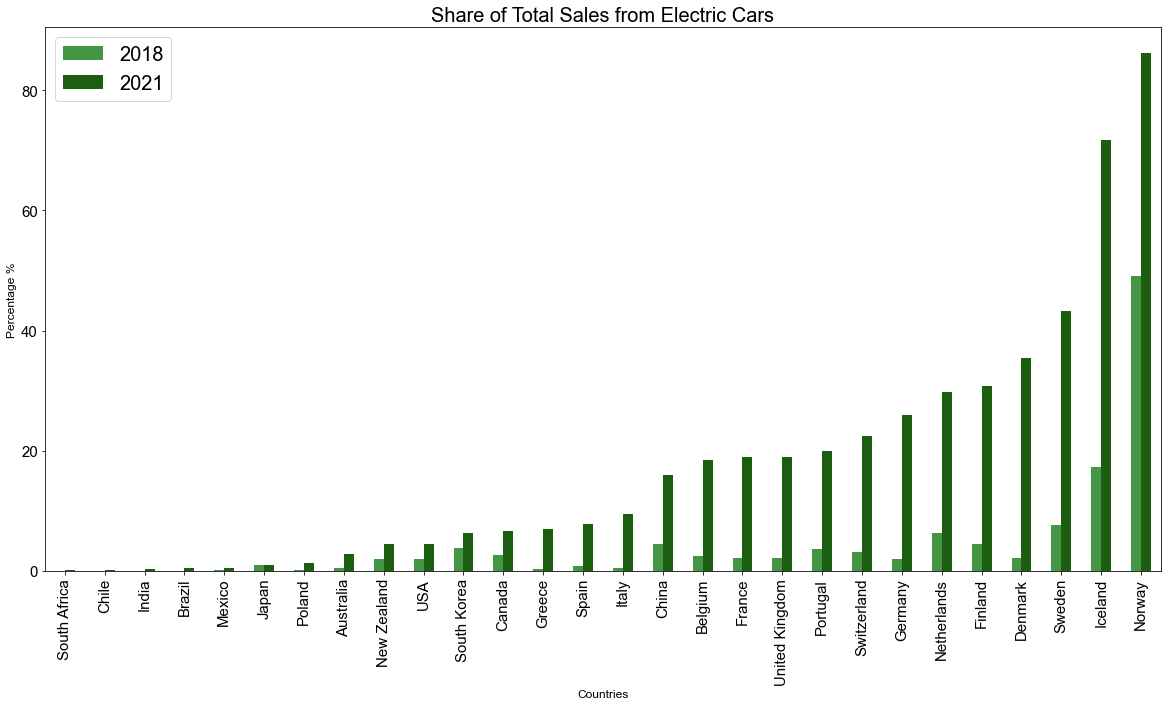

In [22]:
# Visualisation

all_shares.plot(kind = 'bar', 
x = 'country', 
stacked = False,
xlabel = 'Countries',
fontsize = '12',
color = {'2018': '#449644','2021': '#1b5e0f'}
)
plt.title('Share of Total Sales from Electric Cars', fontsize=20)

plt.xlabel('Countries', fontsize=12)
plt.ylabel('Percentage %', fontsize=12)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(prop={'size': 20})

plt.show()

Bar Plot (Share of Primary Energy from Renewable Sources) Comparing 2000 with 2021

In [23]:
# Gets 2021 data for chosen country

is_21 = renewable_share.Year == 2021
share_21 = renewable_share[is_21]
share_21 = share_21.reset_index()
share_21 = share_21.drop('index', axis=1)

def get_2021(c):
    for i in range(len(share_21.Entity)):
        if share_21.Entity[i] == c:
            a = share_21['Renewables (% equivalent primary energy)'][i]

    #r = pd.DataFrame([a], columns=[c]) not required

    return a


In [24]:
# Gets 2000 data for chosen country

is_00 = renewable_share.Year == 2000
share_00 = renewable_share[is_00]
share_00 = share_00.reset_index()
share_00 = share_00.drop('index', axis=1)

def get_2000(c):
    for i in range(len(share_00.Entity)):
        if share_00.Entity[i] == c:
            a = share_00['Renewables (% equivalent primary energy)'][i]

    #r = pd.DataFrame([a], columns=[c]) not required

    return a

In [25]:
# Getting countries 2000

k = get_2000('Iceland')
w = get_2000('World')
e = get_2000('Europe')
af = get_2000('Africa')
a = get_2000('Asia')
ap = get_2000('Asia Pacific (BP)')
t = get_2000('Trinidad and Tobago')
au = get_2000('Australia')
o = get_2000('Oceania')

to_2000 = [af, a, ap, au, w, e, o]
countries = ['Africa', 'Asia', 'Asia Pacific (BP)', 'Australia', 'World', 'Europe', 'Oceania']

In [26]:
sorted_21 = share_21.sort_values(by=['Renewables (% equivalent primary energy)'])

In [27]:
# Getting countries 2021

ksi = get_2021('Iceland')
wor = get_2021('World')
eur = get_2021('Europe')
afr = get_2021('Africa')
asi = get_2021('Asia')
asp = get_2021('Asia Pacific (BP)')
tnt = get_2021('Trinidad and Tobago')
aus = get_2021('Australia')
oce = get_2021('Oceania')

to_2021 = [afr, asi, asp, aus, wor, eur, oce]
countries = ['Africa', 'Asia', 'Asia Pacific (BP)', 'Australia', 'World', 'Europe', 'Oceania']


In [28]:
lowest = 0
entity = []
for i in share_21.Entity:
    r = get_2021(i)
    if lowest < r < 25:
        lowest = r
        entity.append(i)

print(f"{lowest}, {entity[-1]}")


highest = 0
ent = []
for j in share_21.Entity:
     k = get_2021(j)
     if k > highest:
        highest = k
        ent.append(j)

print(f"{highest}, {ent[-1]}")

23.91737174987793, Latvia
86.8745346069336, Iceland


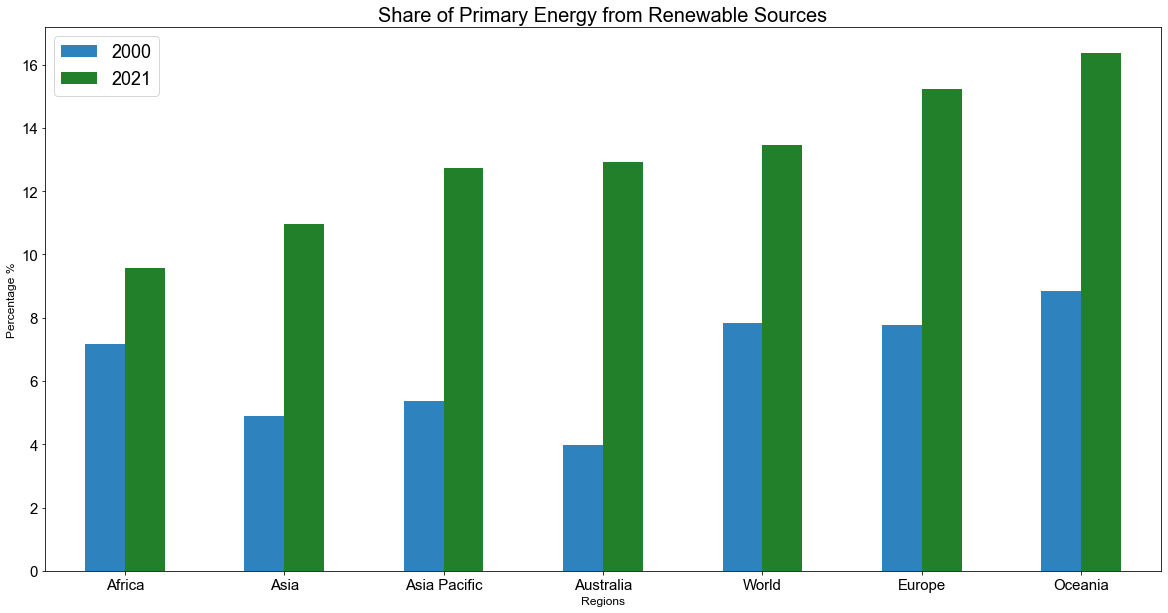

In [29]:
# Visualisation

index = ['Africa', 'Asia', 'Asia Pacific', 'Australia', 'World', 'Europe', 'Oceania']

comp_00_21 = pd.DataFrame({'2000': to_2000, '2021': to_2021}, index=index)

ax = comp_00_21.plot.bar(rot=0, color={'2000': '#2e83bf', '2021': '#218029'})

plt.title('Share of Primary Energy from Renewable Sources', fontsize=20)

plt.legend(prop={'size':18})

plt.xlabel('Regions', fontsize=12)
plt.ylabel('Percentage %', fontsize=12)

plt.show()

Line Graph (Share of Primary Energy from Renewable Sources) 1965-2021

In [30]:
# Gets DataFrame with data for chosen country

def is_country(country):
    r = renewable_share.Entity == country
    ren = renewable_share[r]
    lst = list(ren['Renewables (% equivalent primary energy)'])
    df = pd.DataFrame(lst, columns=[country])
    return df

In [31]:
# Countries 

period = list(range(1965,2022))
aus = is_country('Australia')
nor = is_country('Norway')
usa = is_country('United States')
nzl = is_country('New Zealand')
fin = is_country('Finland')
can = is_country('Canada')
swe = is_country('Sweden')
chi = is_country('China')
ice = is_country('Iceland')
zaf = is_country('South Africa')
unk = is_country('United Kingdom')

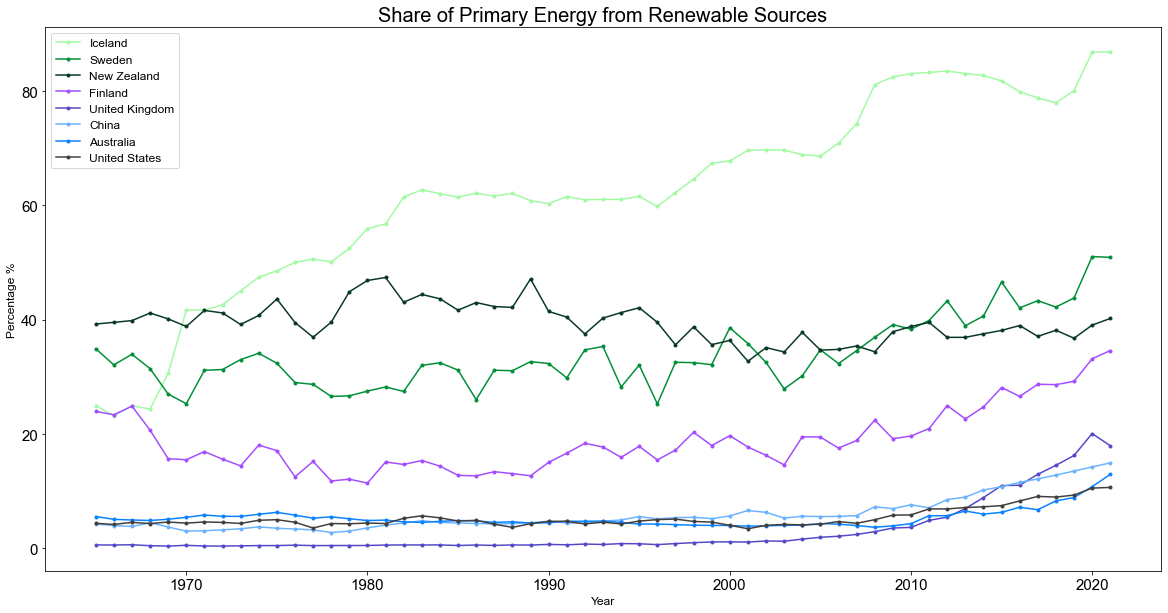

In [32]:
# Visualisation

renewable = pd.DataFrame(period, columns=['Year'])
com_ren = pd.concat([renewable, aus, nor, usa, nzl, fin, can, swe, chi, ice, zaf, unk], axis=1)

plt.title('Share of Primary Energy from Renewable Sources', fontsize=20)
plt.plot(com_ren.Year, com_ren.Iceland, '.-', color='#A2FAA3', label='Iceland')
plt.plot(com_ren.Year, com_ren.Sweden, '.-', color='#008F39', label='Sweden')
plt.plot(com_ren.Year, com_ren['New Zealand'], '.-', color='#093824', label='New Zealand')
plt.plot(com_ren.Year, com_ren.Finland, '.-', color='#a34dff', label='Finland')
plt.plot(com_ren.Year, com_ren['United Kingdom'], '.-', color='#5448C8', label='United Kingdom')
plt.plot(com_ren.Year,com_ren.China, '.-', color='#6bb3ff', label='China')
plt.plot(com_ren.Year, com_ren.Australia, '.-', color='#0a81ff', label='Australia')
plt.plot(com_ren.Year, com_ren['United States'], '.-', color='#423E3B', label='United States')

plt.xlabel('Year', fontsize=12)

plt.ylabel('Percentage %', fontsize=12)

plt.legend(loc='upper left', prop={'size':12})

plt.show()

Choropleth (Share of Primary Energy from Renewable Sources) 1965-2021

In [33]:
# Filtered DataFrame

cull = renewable_share['Entity'].isin(world_geo.name)
a_share = renewable_share[cull]
us = renewable_share['Entity'] == 'United States'
us_ren = renewable_share[us]
eq = pd.concat([a_share, us_ren], axis=0)


In [34]:
# Visualisation

px.choropleth(eq,
locations = 'Entity',
locationmode = 'country names',
color = 'Renewables (% equivalent primary energy)',
animation_frame = 'Year',
scope = 'world',
height = 750,
range_color = (0,75),
title = 'Share of Primary Energy from Renewable Sources (1965 to 2021)',
color_continuous_scale = 'Plasma',

)